In [2]:
!wget https://www.dropbox.com/scl/fo/herkhsp66a9i783ih78bv/h?rlkey=jb59h70j6ehilvy5dschmzad3&dl=0

--2024-03-30 01:45:22--  https://www.dropbox.com/scl/fo/herkhsp66a9i783ih78bv/h?rlkey=jb59h70j6ehilvy5dschmzad3
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6edf41553291b3f640868a6bed.dl.dropboxusercontent.com/zip_download_get/BzbCCgQ88n8eEe9fMSa6xWyOkLhrVe0isHcJRjOpZimsGet-aOzxLocdYXYLxebTjoV1ywRmwTVtHyCz4VJyrxoc0rcbD9bFs78T0X_mq41igw# [following]
--2024-03-30 01:45:27--  https://uc6edf41553291b3f640868a6bed.dl.dropboxusercontent.com/zip_download_get/BzbCCgQ88n8eEe9fMSa6xWyOkLhrVe0isHcJRjOpZimsGet-aOzxLocdYXYLxebTjoV1ywRmwTVtHyCz4VJyrxoc0rcbD9bFs78T0X_mq41igw
Resolving uc6edf41553291b3f640868a6bed.dl.dropboxusercontent.com (uc6edf41553291b3f640868a6bed.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f
Connecting to uc6edf41553291b3f640868a6bed.dl.dropboxusercontent.com (uc6e

In [3]:
!unzip /content/h?rlkey=jb59h70j6ehilvy5dschmzad3

Archive:  /content/h?rlkey=jb59h70j6ehilvy5dschmzad3
mapname:  conversion of  failed
   creating: Brain Tumor/
 extracting: metadata.csv            
   creating: Brain Tumor Data Set/
 extracting: metadata_rgb_only.csv   
 extracting: Brain Tumor/Cancer (1).jpg  
 extracting: Brain Tumor/Cancer (1).png  
 extracting: Brain Tumor/Cancer (1).tif  
 extracting: Brain Tumor/Cancer (10).jpg  
 extracting: Brain Tumor/Cancer (10).tif  
 extracting: Brain Tumor/Cancer (11).jpg  
 extracting: Brain Tumor/Cancer (11).tif  
 extracting: Brain Tumor/Cancer (12).jpg  
 extracting: Brain Tumor/Cancer (101).jpg  
 extracting: Brain Tumor/Cancer (100).jpg  
 extracting: Brain Tumor/Cancer (102).jpg  
 extracting: Brain Tumor/Cancer (103).jpg  
 extracting: Brain Tumor/Cancer (104).jpg  
 extracting: Brain Tumor/Cancer (105).jpg  
 extracting: Brain Tumor/Cancer (106).jpg  
 extracting: Brain Tumor/Cancer (107).jpg  
 extracting: Brain Tumor/Cancer (108).jpg  
 extracting: Brain Tumor/Cancer (109).jpg

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [5]:
# count the number of images in the respective classes (where 0 = Brain tumor , 1 = healthy)
ROOT_DIR = "/content/Brain Tumor Data Set/Brain Tumor Data Set"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [6]:
number_of_images.items()

dict_items([('Healthy', 670), ('Brain Tumor', 2216)])

# Splitting the data in Such a way
  1- 70% of data for training purposes
  2- 15% of data for Validation
  3- 15% of data for Testing

In [7]:
# Creating a training Folder
def dataFolder(p, split):
    if not os.path.exists("./"+p):
      os.mkdir("./"+p)


      for dir in os.listdir(ROOT_DIR):
        os.makedirs("./" +p+"/"+dir)

        for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                    size = (math.floor(split*number_of_images[dir]) -2), replace=False):

          O = os.path.join(ROOT_DIR, dir, img) # path
          D = os.path.join("./"+p, dir)
          shutil.copy(O,D)
          os.remove(O)

    else:
      print(f"{p}the folder exist")

In [8]:
dataFolder("train", 0.7)

In [9]:
dataFolder("Val", 0.15)

In [10]:
dataFolder("test", 0.15)

## Model Build

In [11]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [12]:
## CNN Model

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape = (224, 224,3)))


model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


model.add(Dropout(rate = 0.25))


model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units=1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [13]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

# Preparing my data using Data Generator

In [14]:
def preprocessingImages1(path):

  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [15]:
path = "/content/train"

train_data = preprocessingImages1(path)

Found 2015 images belonging to 2 classes.


In [16]:
def preprocessingImages2(path):

  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [17]:
path = "/content/test"

test_data = preprocessingImages2(path)

Found 428 images belonging to 2 classes.


In [18]:
path = "/content/Val"

Val_data = preprocessingImages2(path)

Found 428 images belonging to 2 classes.


In [40]:
## Early Stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience= 6, verbose= 1, mode = 'auto')

# Model check point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose= 1, save_best_only=True,  mode = 'auto')

cd = [es,mc]

# Model Training

In [ ]:
# Model Train

hs = model.fit_generator(generator=train_data, steps_per_epoch= 8, epochs=30, verbose=1, validation_data=Val_data, validation_steps=16, callbacks= cd)



<ipython-input-41-33e731c6aa13>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs = model.fit_generator(generator=train_data, steps_per_epoch= 8, epochs=30, verbose=1, validation_data=Val_data, validation_steps=16, callbacks= cd)


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.4668 - accuracy: 0.7843


Epoch 1: val_accuracy improved from -inf to 0.78505, saving model to ./bestmodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 76s 9s/step - loss: 0.4668 - accuracy: 0.7843 - val_loss: 0.4174 - val_accuracy: 0.7850
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.5037 - accuracy: 0.7344

8/8 [==============================] - 54s 7s/step - loss: 0.5037 - accuracy: 0.7344
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.4529 - accuracy: 0.8203

8/8 [==============================] - 52s 6s/step - loss: 0.4529 - accuracy: 0.8203
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.4584 - accuracy: 0.8047

8/8 [==============================] - 49s 6s/step - loss: 0.4584 - accuracy: 0.8047
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.4900 - accuracy: 0.7617

8/8 [==============================] - 50s 6s/step - loss: 0.4900 - accuracy: 0.7617
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 0.3817 - accuracy: 0.8164

8/8 [==============================] - 50s 6s/step - loss: 0.3817 - accuracy: 0.8164
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.4243 - accuracy: 0.8125

8/8 [==============================] - 51s 6s/step - loss: 0.4243 - accuracy: 0.8125
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 0.4467 - accuracy: 0.7695

8/8 [==============================] - 51s 6s/step - loss: 0.4467 - accuracy: 0.7695
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 0.3882 - accuracy: 0.7961

8/8 [==============================] - 52s 6s/step - loss: 0.3882 - accuracy: 0.7961
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 0.4005 - accuracy: 0.8164

8/8 [==============================] - 54s 6s/step - loss: 0.4005 - accuracy: 0.8164
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 0.3909 - accuracy: 0.8039

8/8 [==============================] - 52s 7s/step - loss: 0.3909 - accuracy: 0.8039
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 0.3428 - accuracy: 0.8471

8/8 [==============================] - 51s 6s/step - loss: 0.3428 - accuracy: 0.8471
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 0.4213 - accuracy: 0.8125

8/8 [==============================] - 51s 6s/step - loss: 0.4213 - accuracy: 0.8125
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 0.3909 - accuracy: 0.8125

8/8 [==============================] - 52s 6s/step - loss: 0.3909 - accuracy: 0.8125
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 0.3354 - accuracy: 0.8281

8/8 [==============================] - 50s 6s/step - loss: 0.3354 - accuracy: 0.8281
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 0.3630 - accuracy: 0.8242

8/8 [==============================] - 49s 6s/step - loss: 0.3630 - accuracy: 0.8242


In [24]:
# Model graphical interpretation

h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

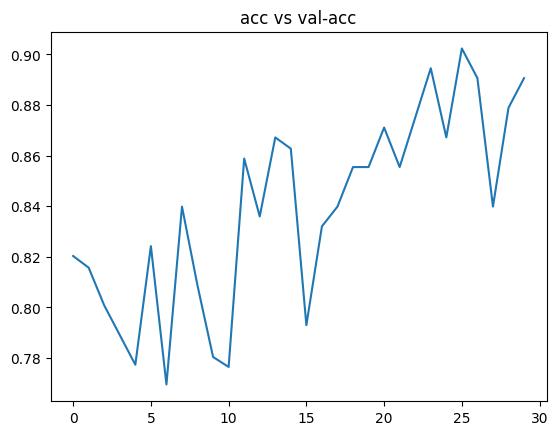

In [25]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

plt.title("acc vs val-acc")
plt.show

In [26]:
# Model accuracy

from keras.models import load_model

model = load_model("/content/bestmodel.h5")

# Model accuracy


In [27]:
acc = model.evaluate(test_data)[1]

print(f"the accuracy of our model is {acc*100} %")

14/14 [==============================] - 25s 2s/step - loss: 0.3969 - accuracy: 0.7850
the accuracy of our model is 78.50467562675476 %


In [28]:
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
path = "/content/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1358).jpg"

img = load_img(path, target_size=(224, 224))
input_arr = img_to_array(img) / 255  # Normalizing correctly

plt.imshow(input_arr)
plt.show()

input_arr = np.expand_dims(input_arr, axis=0)

predictions = model.predict(input_arr)
pred_class = np.argmax(predictions[0] [0])

if pred_class == 1:
    print("The MRI shows indication of a tumor.")
else:
    print("The MRI does not show indication of a tumor.")



In [32]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}